In [17]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Problem 5 (C).

Let $f: \mathbb{R} \rightarrow \mathbb{R}$ such that $f(x)=x^2+x+1$. Sample 11 points evenly distributed from -1 to 1 for training data (i.e. take $[-1,-.8,-.6,-.4,-.2,0, .2, .4, .6, .8,1]$ for the training samples). Then let $y=f(X)$ (we apply $f$ to each point $X$ ).

(a) Using $(X, y)$ as training data solve kernel regression using the Gaussian kernel, $K(x, \tilde{x})=\exp \left(-L\|x-\tilde{x}\|_2^2\right)$, for $L=\{.01, .05,1,10,100\}$. Plot the predictions of the learned function on 1000 points on the interval $[-1,1]$.

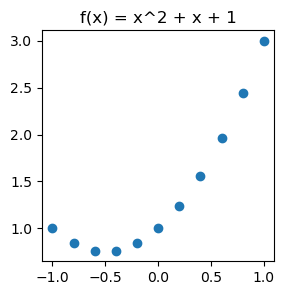

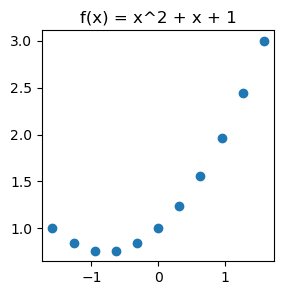

In [26]:
f = lambda x : x**2 + x + 1
x = np.linspace(-1, 1, 11)
y = f(x)

# size of image
plt.figure(figsize=(3,3))
plt.title('f(x) = x^2 + x + 1') 
plt.plot(x, y, 'o')

# let us re-scale the data first 

scale = StandardScaler() 
scale.fit(x.reshape(-1,1))
x_scaled = scale.transform(x.reshape(-1,1))

# plot the scaled data

plt.figure(figsize=(3,3))
plt.title('f(x) = x^2 + x + 1')
plt.plot(x_scaled, y, 'o')


# (a)
# fit svm 
svm_clf = SVC(kernel='rbf', gamma=0.5)

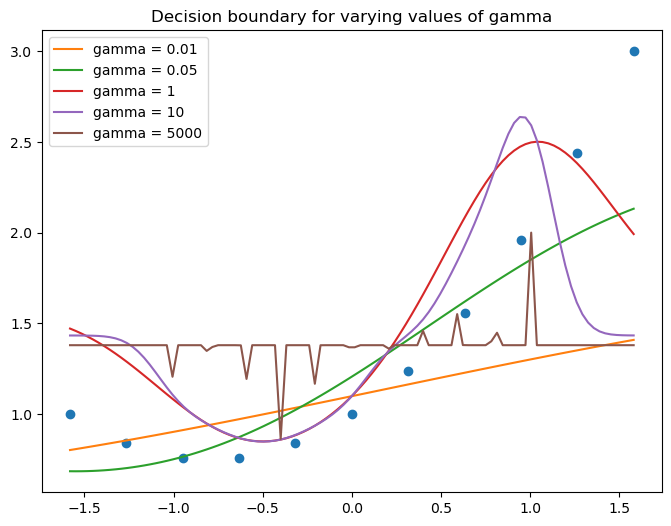

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Define the model and scaler
svm_clf = SVR(kernel='rbf')
scaler = StandardScaler()

# Scale the input data
x_scaled = scaler.fit_transform(x.reshape(-1, 1))

# Plot for different gamma values
plt.figure(figsize=(8, 6))
plt.title("Decision boundary for varying values of gamma")
plt.plot(x_scaled, y, 'o')

for gamma in [0.01, 0.05, 1, 10, 5000]:
    svm_clf.set_params(gamma=gamma)
    svm_clf.fit(x_scaled, y)
    
    # Create test data
    x_test = np.linspace(x_scaled.min(), x_scaled.max(), 100).reshape(-1, 1)
    x_test_scaled = scaler.transform(x_test)
    y_pred = svm_clf.predict(x_test_scaled)
    
    # Plot
    plt.plot(x_test, y_pred, label=f'gamma = {gamma}')

plt.legend()
plt.show()


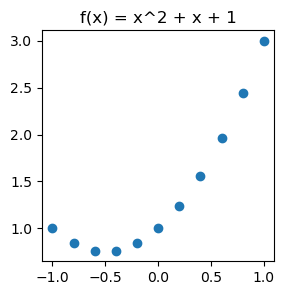

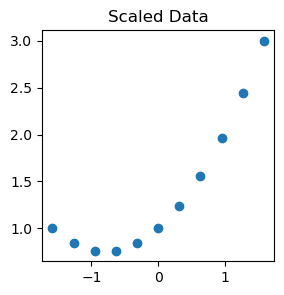

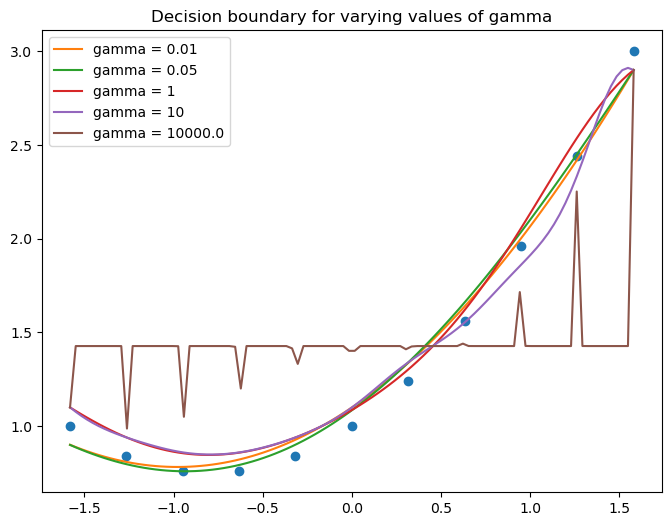

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Define the quadratic function
f = lambda x: x**2 + x + 1
x = np.linspace(-1, 1, 11)
y = f(x)

# Plot original data
plt.figure(figsize=(3,3))
plt.title('f(x) = x^2 + x + 1') 
plt.plot(x, y, 'o')

# Scale the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x.reshape(-1, 1))

# Plot scaled data
plt.figure(figsize=(3,3))
plt.title('Scaled Data')
plt.plot(x_scaled, y, 'o')

# Fit SVR for different gamma values
svm_clf = SVR(kernel='rbf')
plt.figure(figsize=(8, 6))
plt.title("Decision boundary for varying values of gamma")
plt.plot(x_scaled, y, 'o')

for gamma in [0.01, 0.05, 1, 10, 1e4]:
    svm_clf.set_params(gamma=gamma, C=8e6)  # Adding a large C for better fitting
    svm_clf.fit(x_scaled, y)
    
    # Create test data and predict
    x_test = np.linspace(x_scaled.min(), x_scaled.max(), 100).reshape(-1, 1)
    y_pred = svm_clf.predict(x_test)
    
    # Plot the predictions
    plt.plot(x_test, y_pred, label=f'gamma = {gamma}')

plt.legend()
plt.show()

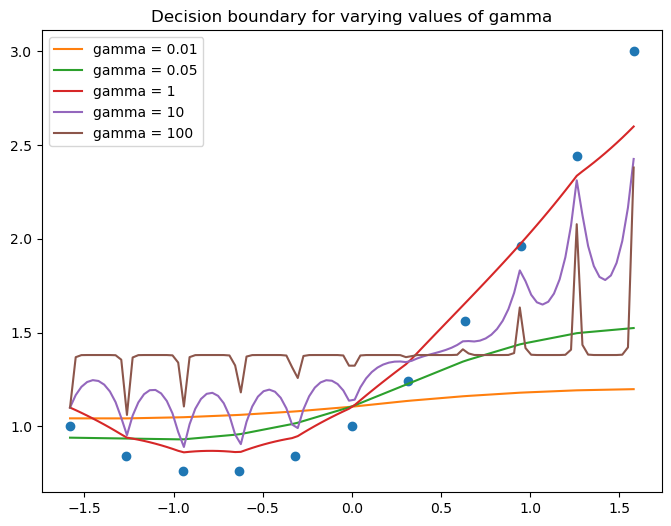

In [47]:
def laplace_kernel(X, Y, gamma):
    return np.exp(-gamma * np.abs(X[:, np.newaxis] - Y).sum(axis=2))

# Fit the model using the custom Laplace kernel
plt.figure(figsize=(8, 6))
plt.title("Decision boundary for varying values of gamma")
plt.plot(x_scaled, y, 'o')

for gamma in [0.01, 0.05, 1, 10, 100]:
    svm_laplace = SVR(kernel=lambda X, Y: laplace_kernel(X, Y, gamma))  # Apply gamma inside kernel
    svm_laplace.fit(x_scaled, y)
    
    # Create test data
    x_test = np.linspace(x_scaled.min(), x_scaled.max(), 100).reshape(-1, 1)
    y_pred = svm_laplace.predict(x_test)
    
    # Plot
    plt.plot(x_test, y_pred, label=f'gamma = {gamma}')

plt.legend()
plt.show()



### Problem 6 

In [1]:
d = 100
n = 20000
import numpy as np 

X = np.random.randn(n, d)

f = lambda x : np.tanh(x).sum(axis=1)
y = f(X)

# generate test data

X_test = np.random.randn(1000, d)
y_test = f(X_test)

In [28]:
# time how long it takes to fit the model
from sklearn.svm import SVR
import time
start = time.time()
svm_clf = SVR(kernel='rbf', C=10000)
svm_clf.fit(X, y)
print('Time to fit the model:', time.time()-start)



Time to fit the model: 154.26108193397522


In [29]:
# Compute MSE on training data and test data
y_pred = svm_clf.predict(X)
mse = ((y - y_pred)**2).mean()
print('MSE on training data:', mse)
y_pred_test = svm_clf.predict(X_test)
mse_test = ((y_test - y_pred_test)**2).mean()
print('MSE on test data:', mse_test)




MSE on training data: 0.009748987060611749
MSE on test data: 3.308846968262728


In [4]:
# auto reload jupyter
%load_ext autoreload
%autoreload 2

import torch
from eigenpro2.kernels import laplacian
from eigenpro2.models import KernelModel
from eigenpro2.kernels import gaussian


if torch.cuda.is_available():
    DEVICE = torch.device("cuda")
    DEV_MEM = torch.cuda.get_device_properties(DEVICE).total_memory//1024**3 - 1 # GPU memory in GB, keeping aside 1GB for safety
else:
    DEVICE = torch.device("cpu")
    DEV_MEM = 8 # RAM available for computing


c = 1


# push all data to the device

device  = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

X = torch.tensor(X, device=DEVICE)
y = torch.tensor(y, device=DEVICE).reshape(-1,1)
X_test = torch.tensor(X_test, device=DEVICE)
y_test = torch.tensor(y_test, device=DEVICE).reshape(-1,1)




kernel_fn = lambda x, y: laplacian(x, y, bandwidth=1.)
model = KernelModel(kernel_fn, X, c, device=DEVICE)
result = model.fit(X, y, X_test, y_test, epochs=15, print_every=5, mem_gb=DEV_MEM)

/var/folders/1q/8cqbm0v914bckckb6rxg6ny80000gn/T/ipykernel_32292/1726352745.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, device=DEVICE)
/var/folders/1q/8cqbm0v914bckckb6rxg6ny80000gn/T/ipykernel_32292/1726352745.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, device=DEVICE).reshape(-1,1)
/var/folders/1q/8cqbm0v914bckckb6rxg6ny80000gn/T/ipykernel_32292/1726352745.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, device=DEVICE)
/var/folders/1q/8cqbm0v914bc

KeyboardInterrupt: 

In [5]:
# auto reload jupyter
%load_ext autoreload
%autoreload 2


import numpy as np 
import torch
from eigenpro2.kernels import laplacian
from eigenpro2.models import KernelModel
from eigenpro2.kernels import gaussian


if torch.cuda.is_available():
    DEVICE = torch.device("cuda")
    DEV_MEM = torch.cuda.get_device_properties(DEVICE).total_memory//1024**3 - 1 # GPU memory in GB, keeping aside 1GB for safety
else:
    DEVICE = torch.device("cpu")
    DEV_MEM = 8 # RAM available for computing


c = 1
n = 50
d = 100

# generate data
X = np.random.randn(n, d)
f = lambda x : np.tanh(x).sum(axis=1)
y = f(X)

# generate test data
X_test = np.random.randn(100, d)
y_test = f(X_test)



# push all data to the device

device  = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

X = torch.tensor(X, device=DEVICE)
y = torch.tensor(y, device=DEVICE).reshape(-1,1)
X_test = torch.tensor(X_test, device=DEVICE)
y_test = torch.tensor(y_test, device=DEVICE).reshape(-1,1)




kernel_fn = lambda x, y: laplacian(x, y, bandwidth=1.)
model = KernelModel(kernel_fn, X, c, device=DEVICE)
result = model.fit(X, y, X_test, y_test, epochs=15, print_every=5, mem_gb=DEV_MEM)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
SVD time: 0.01s, top_q: 15, top_eigval: 0.02, new top_eigval: 2.00e-02
n_subsamples=50, bs_gpu=50, eta=50.00, bs=50, top_eigval=2.00e-02, beta=1.00
--------------------


RuntimeError: expected m1 and m2 to have the same dtype, but got: float != double

In [55]:
y_test

tensor([[-11.4016],
        [ -5.6268],
        [  3.1253],
        ...,
        [  6.0132],
        [-15.5290],
        [ -3.9819]])

In [56]:
n = 1000 # number of samples
d = 100  # dimensions
c = 3    # number of targets

w_star=torch.randn(d, c)
x_train, x_test = torch.randn(n, d), torch.randn(n, d)
y_train, y_test = x_train @ w_star, x_test @ w_star

In [48]:
y_train.shape

torch.Size([1000, 3])